In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [94]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import load_img,array_to_img,img_to_array
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf


In [95]:
import os
import keras.backend as K
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_CHANNEL = 3
N_CLASSES = 3
IMAGE_DATA_FORMAT = K.image_data_format()


img_size = (256, 256)
batch_size = 36

In [3]:
img_folder='/content/drive/My Drive/Camo-Pictures/Train'
target_folder='/content/drive/My Drive/Camo-Pictures/Train-Labels1(Human)'
im=[]
tar=[]
for dir1 in os.listdir(img_folder):
    for file in os.listdir(os.path.join(img_folder, dir1)):
        image= os.path.join(img_folder,dir1, file)
        im.append(image)

for dir2 in os.listdir(target_folder):
    for file1 in os.listdir(os.path.join(target_folder, dir2)):
        image= os.path.join(target_folder,dir2, file1)
        tar.append(image)

input_img_paths=sorted(im)
target_img_paths=sorted(tar)

for input_path, target_path in zip(input_img_paths[:10], target_img_paths[:10]):
    print(input_path, "|", target_path)

/content/drive/My Drive/Camo-Pictures/Train/Camo-Amphibian/COD10K-CAM-4-Amphibian-67-Frog-4680.jpg | /content/drive/My Drive/Camo-Pictures/Train-Labels1(Human)/Object-Camo-Amphibian/COD10K-CAM-4-Amphibian-67-Frog-4680.png
/content/drive/My Drive/Camo-Pictures/Train/Camo-Amphibian/COD10K-CAM-4-Amphibian-67-Frog-4681.jpg | /content/drive/My Drive/Camo-Pictures/Train-Labels1(Human)/Object-Camo-Amphibian/COD10K-CAM-4-Amphibian-67-Frog-4681.png
/content/drive/My Drive/Camo-Pictures/Train/Camo-Amphibian/COD10K-CAM-4-Amphibian-67-Frog-4682.jpg | /content/drive/My Drive/Camo-Pictures/Train-Labels1(Human)/Object-Camo-Amphibian/COD10K-CAM-4-Amphibian-67-Frog-4682.png
/content/drive/My Drive/Camo-Pictures/Train/Camo-Amphibian/COD10K-CAM-4-Amphibian-67-Frog-4683.jpg | /content/drive/My Drive/Camo-Pictures/Train-Labels1(Human)/Object-Camo-Amphibian/COD10K-CAM-4-Amphibian-67-Frog-4683.png
/content/drive/My Drive/Camo-Pictures/Train/Camo-Amphibian/COD10K-CAM-4-Amphibian-67-Frog-4684.jpg | /content/dr

In [4]:
img_folder1='/content/drive/MyDrive/Camo-Pictures/Test'
target_folder1='/content/drive/MyDrive/Camo-Pictures/Test-Labels1(Human)'
im1=[]
tar1=[]
for dir1 in os.listdir(img_folder1):
    for file in os.listdir(os.path.join(img_folder1, dir1)):
        image= os.path.join(img_folder1,dir1, file)
        im1.append(image)

for dir2 in os.listdir(target_folder1):
    for file1 in os.listdir(os.path.join(target_folder1, dir2)):
        image= os.path.join(target_folder1,dir2, file1)
        tar1.append(image)

input_img_pathsv=sorted(im1)
target_img_pathsv=sorted(tar1)

for input_path, target_path in zip(input_img_pathsv[:10], target_img_pathsv[:10]):
    print(input_path, "|", target_path)

/content/drive/MyDrive/Camo-Pictures/Test/Camo-Amphibian/COD10K-CAM-4-Amphibian-67-Frog-4679.jpg | /content/drive/MyDrive/Camo-Pictures/Test-Labels1(Human)/Object-Camo-Amphibian/COD10K-CAM-4-Amphibian-67-Frog-4679.png
/content/drive/MyDrive/Camo-Pictures/Test/Camo-Amphibian/COD10K-CAM-4-Amphibian-67-Frog-4694.jpg | /content/drive/MyDrive/Camo-Pictures/Test-Labels1(Human)/Object-Camo-Amphibian/COD10K-CAM-4-Amphibian-67-Frog-4694.png
/content/drive/MyDrive/Camo-Pictures/Test/Camo-Amphibian/COD10K-CAM-4-Amphibian-67-Frog-4701.jpg | /content/drive/MyDrive/Camo-Pictures/Test-Labels1(Human)/Object-Camo-Amphibian/COD10K-CAM-4-Amphibian-67-Frog-4701.png
/content/drive/MyDrive/Camo-Pictures/Test/Camo-Amphibian/COD10K-CAM-4-Amphibian-67-Frog-4702.jpg | /content/drive/MyDrive/Camo-Pictures/Test-Labels1(Human)/Object-Camo-Amphibian/COD10K-CAM-4-Amphibian-67-Frog-4702.png
/content/drive/MyDrive/Camo-Pictures/Test/Camo-Amphibian/COD10K-CAM-4-Amphibian-67-Frog-4706.jpg | /content/drive/MyDrive/Camo-P

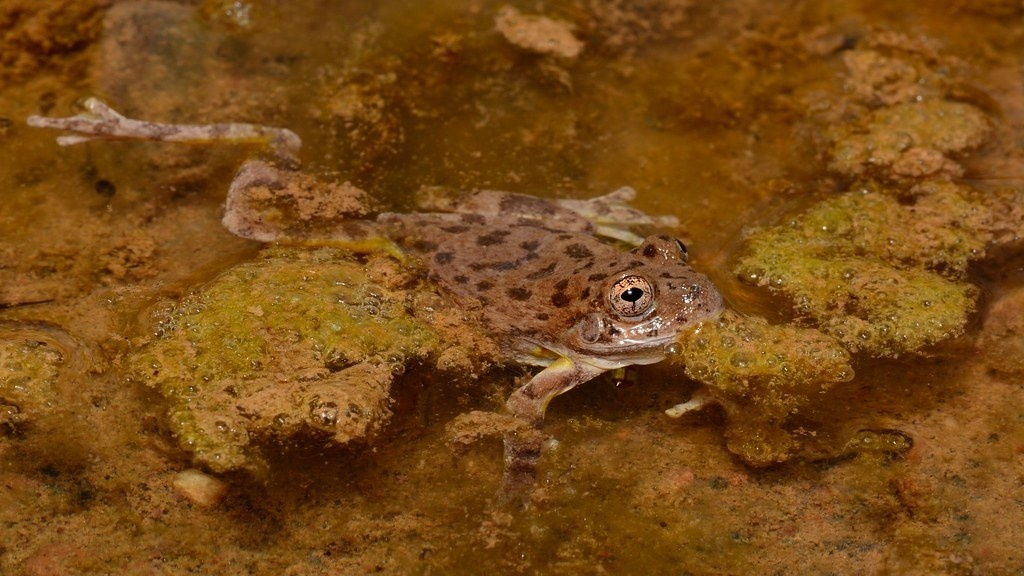

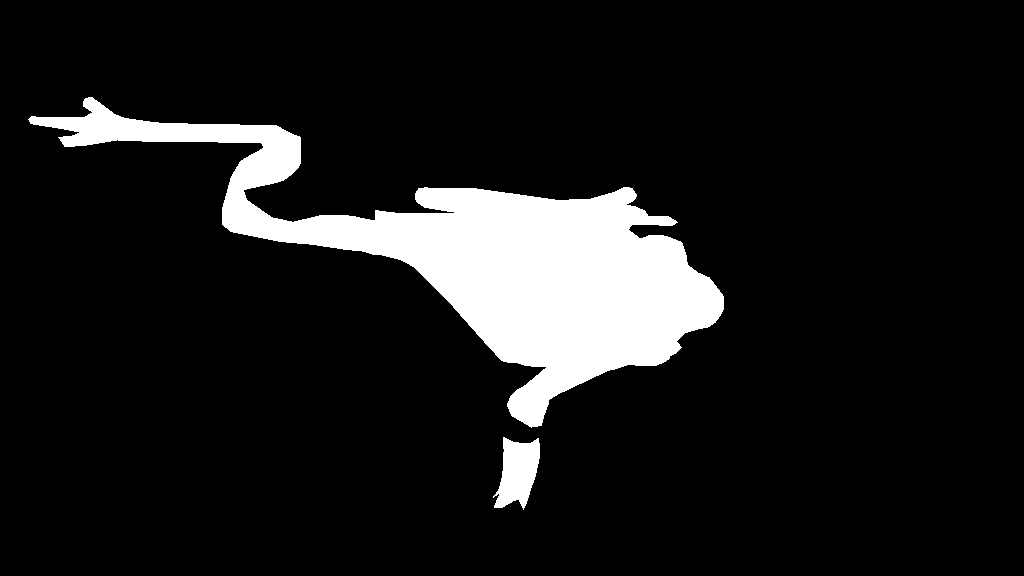

In [5]:
from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import load_img
import PIL
from PIL import ImageOps

# Display input image #7
display(Image(filename=input_img_paths[39]))

# Display auto-contrast version of corresponding target (per-pixel categories)
img = PIL.ImageOps.autocontrast(load_img(target_img_paths[39]))
display(img)

In [7]:
#Using Camouflaged Imgages
input_img_paths=input_img_paths[:3010]
target_img_paths=target_img_paths[:3010]
input_img_pathsv=input_img_pathsv[:2010]
target_img_pathsv=target_img_pathsv[:2010]

In [8]:
#Loading y label data with contours
y_new =np.zeros((len(target_img_paths),) + img_size + (3,), dtype="Float32")
for j, path in enumerate(target_img_paths):
    #obj_path="/content/drive/MyDrive/Camo-Pictures/Test-Labels1(Human)/Object-Camo-Amphibian/COD10K-CAM-4-Amphibian-67-Frog-4679.png"
    img0 = cv2.imread(path)
    img_grey = cv2.cvtColor(img0,cv2.COLOR_BGR2GRAY)
    thresh = 100
    ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)
    #find contours
    contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    img_contours = np.zeros(img0.shape)
    img1=cv2.drawContours(img_contours, contours, -1, (0,255,0), 10)
    img0=cv2.resize(img1,(img_size))
    y_new[j] = img0
    y_new[j] = y_new[j].astype('float')/255

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """Entry point for launching an IPython kernel.


In [9]:
y_new1 =np.zeros((len(target_img_pathsv),) + img_size + (3,), dtype="Float32")
for j, path in enumerate(target_img_pathsv):
    #obj_path="/content/drive/MyDrive/Camo-Pictures/Test-Labels1(Human)/Object-Camo-Amphibian/COD10K-CAM-4-Amphibian-67-Frog-4679.png"
    img0 = cv2.imread(path)
    img_grey = cv2.cvtColor(img0,cv2.COLOR_BGR2GRAY)
    thresh = 100
    ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)
    #find contours
    contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    img_contours = np.zeros(img0.shape)
    img1=cv2.drawContours(img_contours, contours, -1, (0,255,0), 10)
    img0=cv2.resize(img1,(img_size))
    y_new1[j] = img0
    y_new1[j] = y_new1[j].astype('float')/255

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """Entry point for launching an IPython kernel.


In [107]:
#Loading x 
x =np.zeros((len(input_img_paths),) + img_size + (3,), dtype="Float32")
for j, path in enumerate(input_img_paths):
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img0=cv2.resize(img,(img_size))
    # image1=x.append(img.astype('float')/255)
    # x=np.array(x)
    x[j] = img0
    x[j]=x[j].astype('float')/255

In [108]:
x2 =np.zeros((len(input_img_pathsv),) + img_size + (3,), dtype="Float32")
for j, path in enumerate(input_img_pathsv):
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img0=cv2.resize(img,(img_size))
    # image1=x.append(img.astype('float')/255)
    # x=np.array(x)
    x2[j] = img0
    x2[j]=x2[j].astype('float')/255

In [109]:
x.shape

(3010, 256, 256, 3)

In [110]:
#Terrestrial
# x_train=x[1989:3011]
# y_train=y_new[1989:3011]
# x_valid=x2[1308:2011]
# y_valid=y_new1[1308:2011]

#Amphibian
x_train=x[0:220]
y_train=y_new[0:220]
x_valid=x2[0:124]
y_valid=y_new1[0:124]

#Aquatic
# x_train=x[220:978]
# y_train=y_new[220:978]
# x_valid=x2[124:594]
# y_valid=y_new1[124:594]

#Flying
x_train=x[978:1989]
y_train=y_new[978:1989]
x_valid=x2[594:1308]
y_valid=y_new1[594:1308]

In [111]:
#Over sampling the data

new_xtrain=np.stack((x_train,x_train,x_train),axis=0)
new_ytrain=np.stack((y_train,y_train,y_train),axis=0)
new_xvalid=np.stack((x_valid,x_valid,x_valid),axis=0)
new_yvalid=np.stack((y_valid,y_valid,y_valid),axis=0)

# #Flying
# new_xtrain=new_xtrain.reshape(1011*3,256,256,3)
# new_ytrain=new_ytrain.reshape(1011*3,256,256,3)
# new_xvalid=new_xvalid.reshape(714*3,256,256,3)
# new_yvalid=new_yvalid.reshape(714*3,256,256,3)

# #Amphibian
new_xtrain=new_xtrain.reshape(220*3,256,256,3)
new_ytrain=new_ytrain.reshape(220*3,256,256,3)
new_xvalid=new_xvalid.reshape(124*3,256,256,3)
new_yvalid=new_yvalid.reshape(124*3,256,256,3)

# #Aquatic
# new_xtrain=new_xtrain.reshape(758*3,256,256,3)
# new_ytrain=new_ytrain.reshape(758*3,256,256,3)
# new_xvalid=new_xvalid.reshape(470*3,256,256,3)
# new_yvalid=new_yvalid.reshape(470*3,256,256,3)

#Terrestrial
# new_xtrain=new_xtrain.reshape(1021*3,256,256,3)
# new_ytrain=new_ytrain.reshape(1021*3,256,256,3)
# new_xvalid=new_xvalid.reshape(702*3,256,256,3)
# new_yvalid=new_yvalid.reshape(702*3,256,256,3)

ValueError: ignored

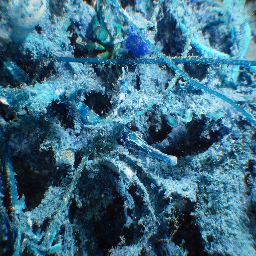

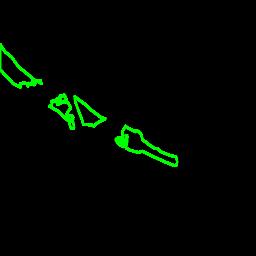

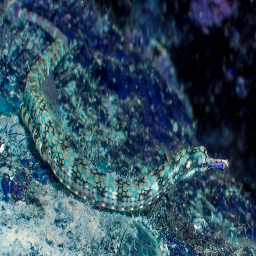

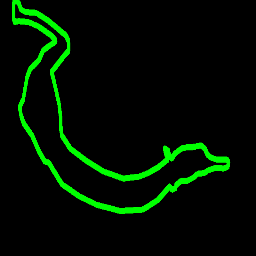

In [34]:
#Aquatic
img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(new_xtrain[101]))
display(img)

img1 = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(new_ytrain[101]))
display(img1)

img3 = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(new_xvalid[101]))
display(img3)

img4 = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(new_yvalid[101]))
display(img4)

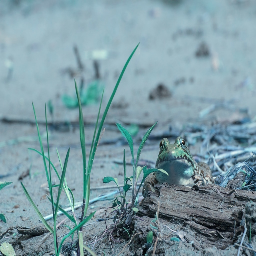

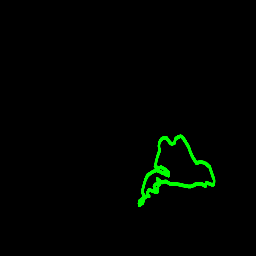

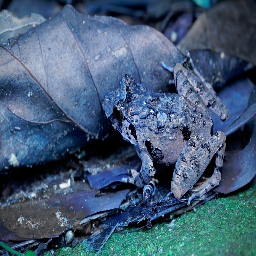

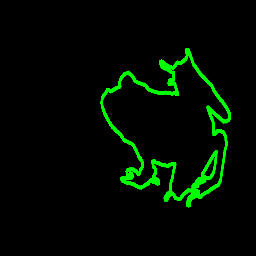

In [30]:
#Amphibian
img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(new_xtrain[101]))
display(img)

img1 = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(new_ytrain[101]))
display(img1)

img3 = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(new_xvalid[101]))
display(img3)

img4 = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(new_yvalid[101]))
display(img4)

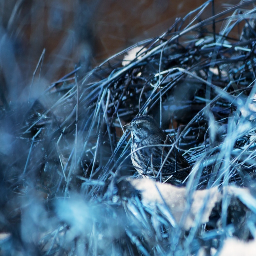

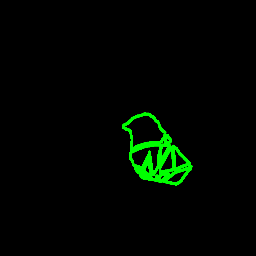

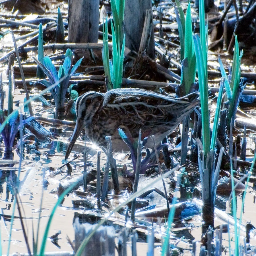

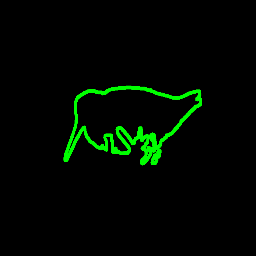

In [27]:
#Flying
img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(new_xtrain[101]))
display(img)

img1 = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(new_ytrain[101]))
display(img1)

img3 = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(new_xvalid[101]))
display(img3)

img4 = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(new_yvalid[101]))
display(img4)

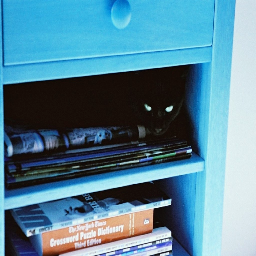

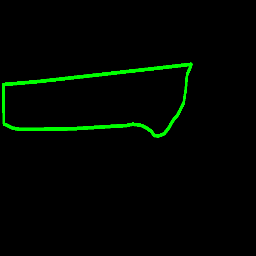

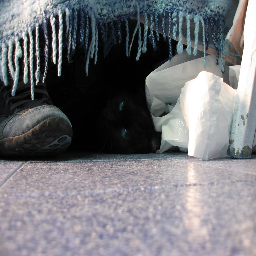

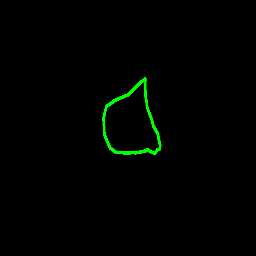

In [22]:
#Terrestrial
img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(new_xtrain[101]))
display(img)

img1 = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(new_ytrain[101]))
display(img1)

img3 = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(new_xvalid[101]))
display(img3)

img4 = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(new_yvalid[101]))
display(img4)

In [35]:
#Shuffling data
import random
random.Random(1337).shuffle(new_xtrain)
random.Random(1337).shuffle(new_ytrain)
random.Random(1337).shuffle(new_xvalid)
random.Random(1337).shuffle(new_yvalid)



In [ ]:
model_sinet.reset_states()
tf.keras.backend.clear_session()

In [77]:
#Resizing the image as to match the weights as terrestrial category pictures where trained on 160 160 images 
# IMG_HEIGHT = 160
# IMG_WIDTH = 160
# IMG_CHANNEL = 3
# N_CLASSES = 3
# IMAGE_DATA_FORMAT = K.image_data_format()


# img_size = (160, 160)
# batch_size = 36

In [78]:
import os
import sys
import warnings
from keras.regularizers import l2
warnings.filterwarnings("ignore")

import numpy as np
from keras.layers import (
    Conv2D, BatchNormalization, Dense, 
    ZeroPadding2D, Activation, GlobalAveragePooling2D,
    Reshape, Permute, multiply, AveragePooling2D,
    UpSampling2D, Concatenate, Add, Lambda, Multiply
)
from keras.models import Model, Sequential
from keras.layers import Input
import keras.backend as K
from keras.layers import DepthwiseConv2D, PReLU

class SiNet:
    def __init__(self, img_height, img_width, img_channel, n_classes, reg=1e-4):
        self.img_height = img_height
        self.img_width = img_width
        self.img_channel = img_channel
        self.n_classes = n_classes
        self.reg = reg
        self.channel_axis = -1
        self.alpha = 1.0
        self.image_val = 0.017
        self.mean_substraction = [103.94, 116.78, 123.68]
        
    def relu6(self, x):
        return K.relu(x, max_value=6)
    
    def _conv_block(self, inputs, filters, alpha, strides=(1,1), kernel=(3,3), block_id=1, padding="valid"):
        """"""
        filters = int(filters * alpha)
        
        if padding=="same":
            x = inputs
        else:
            x = ZeroPadding2D((1, 1), data_format=IMAGE_DATA_FORMAT, 
                              name="conv_%s_pad" % block_id)(inputs)        
        
        x = Conv2D(filters, kernel, data_format=IMAGE_DATA_FORMAT, 
                   padding=padding, use_bias=False, strides=strides, 
                   kernel_initializer="he_normal", kernel_regularizer=l2(self.reg), 
                   name="conv_%s" % block_id)(x)
        x = BatchNormalization(axis=self.channel_axis, name="conv_%s_bn" % block_id)(x)
        x = Activation("relu", name="conv_%s_act" % block_id)(x)
        
        return x
    
    def _pointwise_conv_block(self, inputs, pointwise_conv_filters, alpha, 
                              strides=(1, 1), block_id=1):
        x = Conv2D(pointwise_conv_filters, 
                   (1, 1),
                   data_format=IMAGE_DATA_FORMAT,
                   padding="same",
                   use_bias=False,
                   strides=(1, 1),
                   kernel_initializer="he_normal",
                   kernel_regularizer=l2(self.reg),
                   name="conv_pw_%s" % block_id)(inputs)
        x = BatchNormalization(axis=self.channel_axis,
                               name="conv_pw_%s_bn" % block_id)(x)
        x = Activation("relu", name="conv_pw_%s_relu" % block_id)(x)
        
        return x
        
    def _depthwise_conv_block(self, inputs, pointwise_conv_filters, alpha, 
                              depth_multiplier=1, strides=(1, 1), block_id=1, 
                              kernel=(3,3), padding_size=(1, 1)):
        """"""
        pointwise_conv_filters = int(pointwise_conv_filters * alpha)
        
        x = ZeroPadding2D(padding_size, 
                          data_format=IMAGE_DATA_FORMAT,
                          name="conv_pad_%s" % block_id)(inputs)
        x = DepthwiseConv2D(kernel_size=kernel,
                            data_format=IMAGE_DATA_FORMAT,
                            depth_multiplier=depth_multiplier,
                            strides=strides,
                            use_bias=False,
                            depthwise_regularizer=l2(self.reg),
                            name="conv_dw_%s" % block_id)(x)
        x = BatchNormalization(axis=self.channel_axis,
                               name="conv_dw_%s_bn" % block_id)(x)
#         x = Activation("PReLu", name="conv_dw_%d_Prelu" % block_id)(x)
        x = PReLU(name="conv_dw_%s_Prelu" % block_id)(x)
        
        x = self._pointwise_conv_block(x, pointwise_conv_filters, self.alpha, block_id=block_id)
        
        return x
    
    def _squeeze_excite_block(self, inputs, ratio=16, block_id=1):
        """"""
        filters = inputs.shape[self.channel_axis]
        se_shape = (1, 1, filters) if self.channel_axis == -1 else (filters, 1, 1)
        
        se = GlobalAveragePooling2D(name="squeeze_glo_avg_%s" % block_id)(inputs)
        se = Dense(filters // ratio, activation="relu", 
                   kernel_initializer="he_normal",
                   kernel_regularizer=l2(self.reg),
                   use_bias=False, name="squeeze_squ_%s" % block_id)(se)
        se = Dense(filters, activation="relu", 
                   kernel_initializer="he_normal",
                   kernel_regularizer=l2(self.reg),
                   use_bias=False, 
                   name="squeeze_exci_%s" % block_id)(se)
        se = multiply([inputs, se], name="squeeze_scale_%s" % block_id)
        
        return se
    
    def _depthwise_conv_se_block(self, inputs, pointwise_conv_filters, alpha, 
                                 depth_multiplier=1, strides=(2, 2), block_id=1,
                                 kernel=(3,3), ratio=16):
        """
        DS-Conv + SE
        """
        x = self._depthwise_conv_block(inputs, pointwise_conv_filters, alpha, 
                                       block_id=block_id, strides=strides)
#         x = Activation("relu")(x)
        x = self._squeeze_excite_block(x, ratio=ratio, block_id=block_id)
        x = Activation("relu")(x)
        
        return x
    
    def _s2_block(self, inputs, pointwise_conv_filters, alpha, 
                  depth_multiplier=1, strides=(1, 1), block_id=1,
                  kernel=(3,3), pool_size=(1,1), padding_size=(1, 1)):
        x = AveragePooling2D(pool_size=pool_size, strides=(2, 2), 
                             data_format=IMAGE_DATA_FORMAT, padding="same")(inputs)
        x = Activation("relu")(x)
        x = self._depthwise_conv_block(x, pointwise_conv_filters, alpha, 
                                       block_id=block_id, kernel=kernel, 
                                       padding_size=padding_size)
        x = UpSampling2D(size=(2, 2), interpolation="bilinear", name="s2_block_%s" % block_id)(x)
        x = BatchNormalization(axis=self.channel_axis)(x)
        x = Activation("relu")(x)
        
        return x
    
    def _s2_module(self, inputs, pointwise_conv_filters, alpha,
                   depth_multiplier=1, strides=(1, 1), block_id=1,
                   kernel_conv=(3, 3), kernel_ds_1=(3, 3), 
                   kernel_ds_2=(3, 3), pad_ds_1=(1, 1), pad_ds_2=(1, 1),
                   pool_block_1=(1, 1), pool_block_2=(1, 1)):
        """
        The function to build S2 block
        """
        x = self._conv_block(inputs, pointwise_conv_filters, alpha, 
                             kernel=(1, 1), block_id=block_id, padding="same")
        x1 = self._s2_block(x, pointwise_conv_filters, alpha, depth_multiplier=depth_multiplier,
                            strides=strides, kernel=kernel_ds_1, block_id=str(block_id) + "_1",
                            padding_size=pad_ds_1, pool_size=pool_block_1)
    
        x2 = self._s2_block(x, pointwise_conv_filters, alpha, depth_multiplier=depth_multiplier,
                            strides=strides, kernel=kernel_ds_2, block_id=str(block_id) + "_2", 
                            padding_size=pad_ds_2, pool_size=pool_block_2)
        
        x = Concatenate(axis=self.channel_axis)([x1, x2])
        x = Add()([inputs, x])
#         x = BatchNormalization(axis=self.channel_axis)(x)
        x = PReLU()(x)
        
        return x
    
    def build_encoder(self):
        """
        Build encoder function
        """
        
        input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNEL)
        
        # if IMAGE_DATA_FORMAT == "channels_first":
        #     input_shape = (IMG_CHANNEL, IMG_HEIGHT, IMG_WIDTH)
            
        inputs = Input(shape=input_shape)
        
        x = Lambda(lambda z: z[...,::-1], output_shape=input_shape, 
                   name="swap_color_channel")(inputs)
        
        if self.mean_substraction:
            x = Lambda(lambda z: (z - np.array(self.mean_substraction))*self.image_val,
                       output_shape=input_shape,
                       name="mean_substraction_inputs")(x)
#         x = inputs

        x1 = self._conv_block(x, 12, self.alpha, strides=(2, 2), block_id=1)
        x2 = self._depthwise_conv_se_block(x1, 16, self.alpha, block_id=2)
        x3 = self._depthwise_conv_se_block(x2, 48, self.alpha, block_id=3, strides=(1, 1))
        x4 = self._s2_module(x3, 24, self.alpha, block_id=4, kernel_ds_2=(5, 5), pad_ds_2=(2, 2))
        x5 = self._s2_module(x4, 24, self.alpha, block_id=5)
        
        x6 = Concatenate(axis=self.channel_axis, name="concat_2_5")([x2, x5])
        
        x7 = self._depthwise_conv_se_block(x6, 48, self.alpha, block_id=6)
        x8 = self._depthwise_conv_se_block(x7, 96, self.alpha, block_id=7, strides=(1, 1))
        x9 = self._s2_module(x8, 48, self.alpha, block_id=8, kernel_ds_2=(5, 5), pad_ds_2=(2, 2))
        x10 = self._s2_module(x9, 48, self.alpha, block_id=9)
        x11 = self._s2_module(x10, 48, self.alpha, block_id=10, 
                              kernel_ds_1=(5, 5), pad_ds_1=(2, 2),
                              kernel_ds_2=(3, 3), pool_block_2=(2, 2))
        x12 = self._s2_module(x11, 48, self.alpha, block_id=11,
                              kernel_ds_1=(5, 5), pad_ds_1=(2, 2),
                              kernel_ds_2=(3, 3), pool_block_2=(4, 4))
        x13 = self._s2_module(x12, 48, self.alpha, block_id=12)
        x14 = self._s2_module(x13, 48, self.alpha, block_id=13,
                              kernel_ds_1=(5, 5), pad_ds_1=(2, 2),
                              kernel_ds_2=(5, 5), pad_ds_2=(2, 2))
        x15 = self._s2_module(x14, 48, self.alpha, block_id=14,
                              kernel_ds_1=(3, 3), pool_block_1=(2, 2),
                              kernel_ds_2=(3, 3), pool_block_2=(4, 4))
        x16 = self._s2_module(x15, 48, self.alpha, block_id=15,
                              kernel_ds_1=(3, 3), pool_block_1=(1, 1),
                              kernel_ds_2=(5, 5), pad_ds_2=(2, 2), pool_block_2=(2, 2))
        
        x17 = Concatenate(axis=self.channel_axis, name="concat_16_7")([x16, x7])
        x17 = Activation("relu")(x17)
        
        x = self._pointwise_conv_block(x17, N_CLASSES, self.alpha, block_id=16)
#         x8_pws = self._pointwise_conv_block(x8, N_CLASSES, self.alpha, block_id=17)
#         x = Add(name="x8_xlast_adding")([x8_pws, x])
        x = Activation("relu")(x)
#         x = Activation("relu")(x)
        
#         x = Reshape((-1, self.n_classes))(x)
        
#         x = Activation("softmax")(x)
        
#         model = Model(inputs=inputs, outputs=x)
        
        return inputs, x, x8, x5, x1
    
    def build_decoder(self):
        inputs, x, x8, x5, x1 = self.build_encoder()
        
        x = UpSampling2D((2, 2), data_format=IMAGE_DATA_FORMAT, 
                         interpolation="bilinear")(x)
        x = BatchNormalization(axis=self.channel_axis)(x)
        x_ac = Activation("softmax")(x)
        
        x_blocking = K.max(x_ac, axis=-1, keepdims=True)
        
        x_blocking = Lambda(lambda x: 1 - x, name="information_blocking_decoder")(x_blocking)
        
        x5_pws = self._pointwise_conv_block(x5, self.n_classes, self.alpha, block_id=18)
        
        x_mul = Multiply()([x5_pws, x_blocking])
        x = Activation("relu")(x)
        x = Add()([x_mul, x])
        x = Activation("relu")(x)
        x = UpSampling2D((2, 2), interpolation="bilinear")(x)
        x = BatchNormalization(axis=self.channel_axis)(x)
        x = Activation("relu")(x)
        x = self._conv_block(x, self.n_classes, self.alpha, kernel=(1, 1), padding="same", block_id=19)
#         x1_pws = self._pointwise_conv_block(x1, self.n_classes, self.alpha, block_id=20, strides=(1, 1))
#         x = Add()([x1_pws, x])
#         x = Activation("relu")(x)
        x = UpSampling2D((2, 2), interpolation="bilinear")(x)
        x = BatchNormalization(axis=self.channel_axis)(x)
        x = Activation("softmax")(x)
        # x = Reshape((-1, self.n_classes))(x)
        # x = Activation("softmax")(x)
        
        model = Model(inputs=inputs, outputs=x)
        
        return model

In [79]:
#K.clear_session()
sinet = SiNet(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNEL, N_CLASSES)
model_sinet = sinet.build_decoder()

model_sinet.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
swap_color_channel (Lambda)     (None, 160, 160, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
mean_substraction_inputs (Lambd (None, 160, 160, 3)  0           swap_color_channel[0][0]         
__________________________________________________________________________________________________
conv_1_pad (ZeroPadding2D)      (None, 162, 162, 3)  0           mean_substraction_inputs[0][0]   
_______________________________________________________________________________________

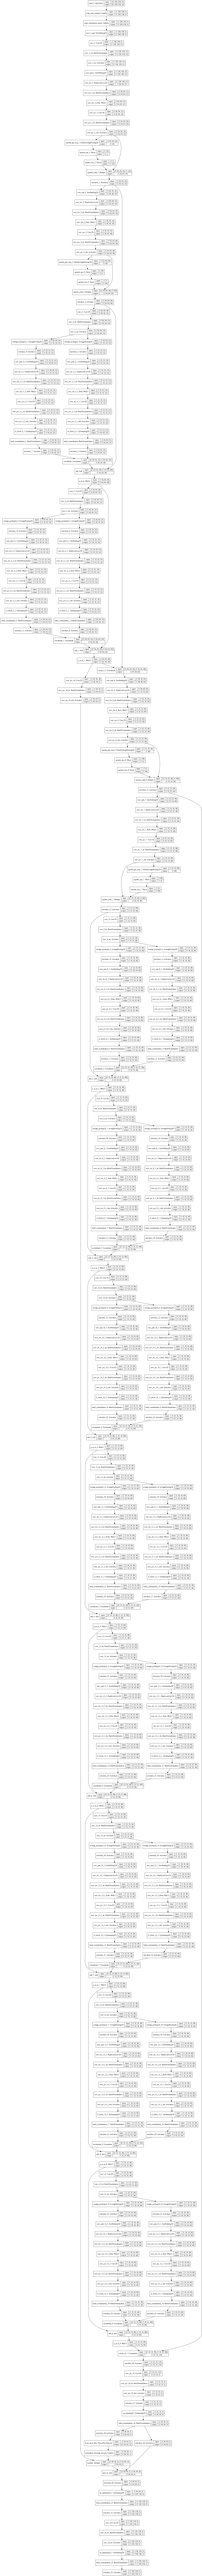

In [36]:
tf.keras.utils.plot_model(model_sinet, show_shapes=True, dpi=64)

In [ ]:
import tensorflow as tf


model_sinet.compile(optimizer='Adamax', loss='categorical_crossentropy')
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                              patience=5, mode='auto')
sinet_model=model_sinet.fit(x=new_xtrain,y=new_ytrain, epochs=30, validation_data=(new_xvalid,new_yvalid), callbacks=[reduce_lr],verbose=1,batch_size=10 )

Epoch 1/30
304/304 [==============================] - 234s 770ms/step - loss: 0.2852 - val_loss: 0.2241
Epoch 2/30
304/304 [==============================] - 232s 764ms/step - loss: 0.1854 - val_loss: 0.1525
Epoch 3/30
304/304 [==============================] - 235s 774ms/step - loss: 0.1341 - val_loss: 0.1606
Epoch 4/30
304/304 [==============================] - 232s 763ms/step - loss: 0.1015 - val_loss: 0.1101
Epoch 5/30
304/304 [==============================] - 232s 765ms/step - loss: 0.0790 - val_loss: 0.1229
Epoch 6/30
304/304 [==============================] - 230s 758ms/step - loss: 0.0627 - val_loss: 0.0563
Epoch 7/30
304/304 [==============================] - 232s 763ms/step - loss: 0.0514 - val_loss: 0.0464
Epoch 8/30
304/304 [==============================] - 233s 767ms/step - loss: 0.0432 - val_loss: 0.0396
Epoch 9/30
304/304 [==============================] - 236s 776ms/step - loss: 0.0367 - val_loss: 0.0449
Epoch 10/30
304/304 [==============================] - 236s 776m

KeyboardInterrupt: ignored

In [80]:
#Loading weights

#Amphibian
##model_sinet.load_weights('/content/mymodel_weights_ampi256.h5')

# #Aquatic
##model_sinet.load_weights('/content/mymodel_weights_aquatic (1).h5')


#Terrestrial
##model_sinet.load_weights('/content/mymodel_weights_terresrial.h5')

In [58]:
#Amphibian
img0=np.expand_dims(new_xvalid[148],axis=0)
val_preds = model_sinet.predict(img0)
image=np.squeeze(val_preds,axis=0)
image2=np.where(image>0.5,1,0)

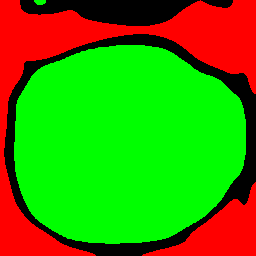

In [52]:
img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(image2))
display(img)

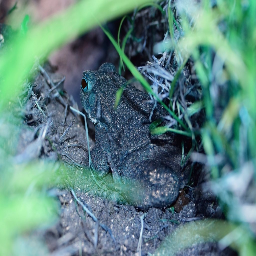

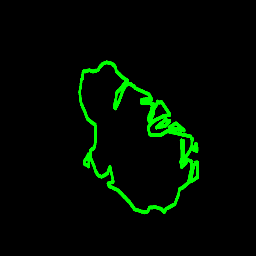

In [50]:
img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(new_xtrain[148]))
display(img)

img1 = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(new_ytrain[148]))
display(img1)

In [60]:
#Aquatic
img0=np.expand_dims(new_xtrain[148],axis=0)
val_preds = model_sinet.predict(img0)
image=np.squeeze(val_preds,axis=0)
image2=np.where(image>0.5,1,0)

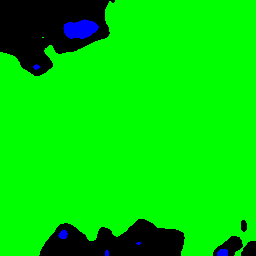

In [61]:
img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(image2))
display(img)

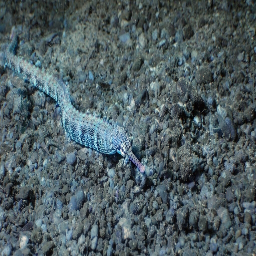

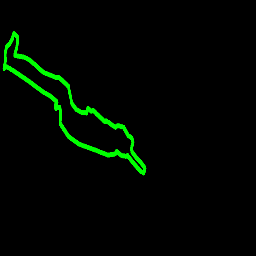

In [62]:
img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(new_xtrain[148]))
display(img)

img1 = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(new_ytrain[148]))
display(img1)

In [83]:
#Terrestrial
x=cv2.resize(new_xtrain[164],(img_size))
img0=np.expand_dims(x,axis=0)
val_preds = model_sinet.predict(img0)
image=np.squeeze(val_preds,axis=0)
image2=np.where(image>0.5,1,0)

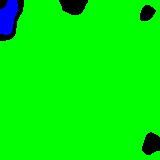

In [84]:
img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(image2))
display(img)

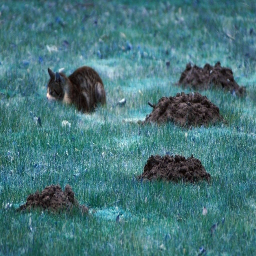

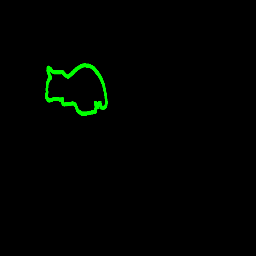

In [87]:
img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(new_xtrain[164]))
display(img)

img1 = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(new_ytrain[164]))
display(img1)